In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


<h1>Importing the CSV Data as Pandas DataFrame</h1>

In [3]:
df= pd.read_csv(r'C:\Users\tanve\OneDrive\Desktop\MLProject\notebook\data\raw.csv')


<h1>Show top 5 Records</h1>

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<h1>Shape of the dataset</h1>

In [5]:
df.shape

(1000, 8)

<h1>2. Dataset information</h1> 

- gender : sex of student -> (Male/Female)
-race/ethnicity : ethnicity of students -> (Group A,B,C,D,E)
- Parental level of education : parent's final education -> (bachekor's degree,some college,maaster's degree, associate's degree, high school)
- Lunch : having lunch before test (standard or free/reduced)
- test preparation course : completed or not completed before test 
- math score
- reading score 
- writing score  

<h1>3. Data Checks to perform</h1>

- Check missing values
- Check Duplicates 
- Check data type 
- Check the number of unique values of each column
- Check statistics of dataset
- Check various categories present in the different categorical column

<h1>3.1 Check missing values</h1>

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset

<h1>3.2 check duplicates</h1>

In [19]:
df.duplicated().sum()

np.int64(0)

There are no duplicate values in the dataset

<h1>3.3 Check data type</h1>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<h1>3.4 Check the number of unique values of each column</h1>

In [22]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

<h1>3.5 Check statistics of datasetCheck statistics of dataset</h1>

In [23]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<h1>Insight</h1>

- From above description the numerical data, all means are very close to each other -between 66 and 68.05;
- All standard deviation are close -between 14.6 and 15.19;
- While there is a minimum score of 0 for maths , for writing  minimum is much higher = 10 and for reading = 17

Exploring data

In [24]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
print("Categories in 'gender' variable:"   ,end=" ")
print(df['gender'].unique())

print("Categories in 'race ethnicity' variable :"   ,end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable:"    ,end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:"   ,end=" ")
print(df['lunch'].unique)

print("Categories in 'test preparation course' variable:"   ,end=" ")
print(df['test_preparation_course'].unique())


Categories in 'gender' variable: ['female' 'male']
Categories in 'race ethnicity' variable : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: <bound method Series.unique of 0          standard
1          standard
2          standard
3      free/reduced
4          standard
           ...     
995        standard
996    free/reduced
997    free/reduced
998        standard
999    free/reduced
Name: lunch, Length: 1000, dtype: object>
Categories in 'test preparation course' variable: ['none' 'completed']


<h1>Defining Numerical and Categorical column </h1>

In [9]:
numerical_features = [features for features in df.columns if df[features].dtype != 'O']
categorical_features = [features for features in df.columns if df[features].dtype =='O']


#printing columns 
print('We have {} numerical featues: {}'.format(len(numerical_features),numerical_features) )
print('\nWe have {} categorical features: {}'.format(len(categorical_features),categorical_features))

We have 3 numerical featues: ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


<h1>Adding columns for 'Total Score' and 'Average'</h1>

In [10]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

df['average'] = df['total_score']/3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [11]:
math_full = df[df['math_score']==100]['average'].count()
reading_full = df[df['reading_score']== 100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Reading: {reading_full} ')
print(f'Number of student with full marks in writing: {writing_full} ')

Number of students with full marks in Maths: 7
Number of students with full marks in Reading: 17 
Number of student with full marks in writing: 14 


In [12]:
math_less_20 = df[df['math_score'] <= 20]['average'].count()
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()

print(f'Number of student with less than 20 marks in Maths:  {math_less_20}')
print(f'Number of student with less than 20 marks in Reading:  {reading_less_20}')
print(f'Number of student with less than 20 marks in Writing:  {writing_less_20}')

Number of student with less than 20 marks in Maths:  4
Number of student with less than 20 marks in Reading:  1
Number of student with less than 20 marks in Writing:  3


<h1>Insights</h1>

- From above values we get students have performed the worst in Maths
- Best performance is in reading section

<h1>4. Exploring Data(Visualization)</h1>


<h2>4.1 Visualize average score distribution o make some conclusion</h2>

- histogram
- Kernel Distribution Function (KDE)



<h2>4.1.1 Histogram & KDE</h2>

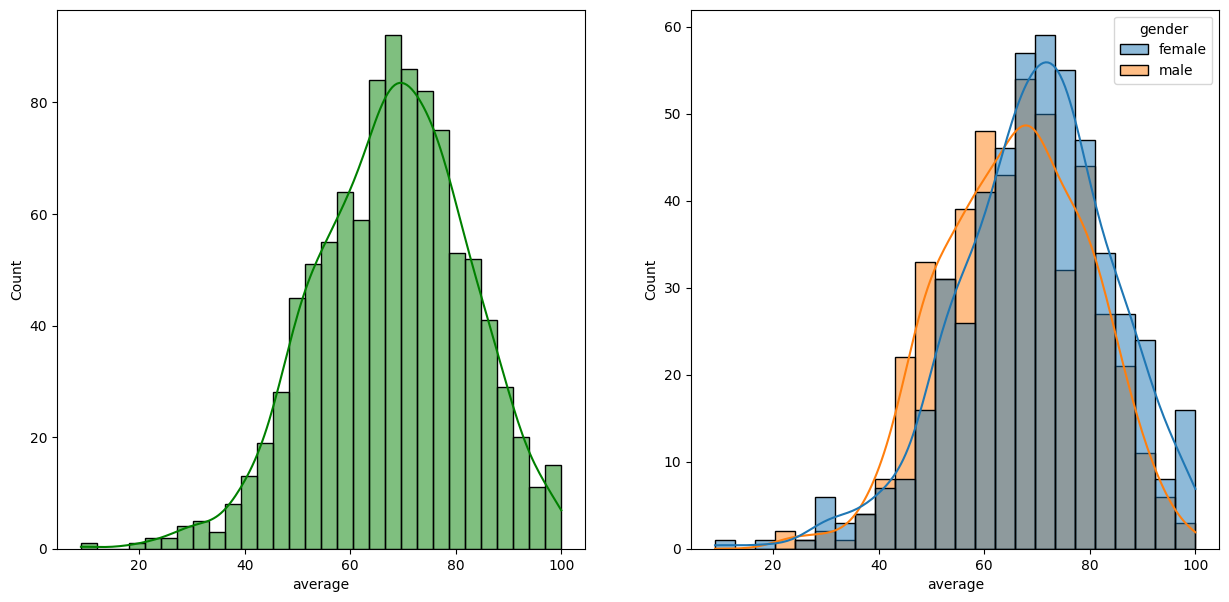

In [13]:
fig, axs = plt.subplots(1,2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df, x='average' , kde=True, hue='gender')
plt.show()

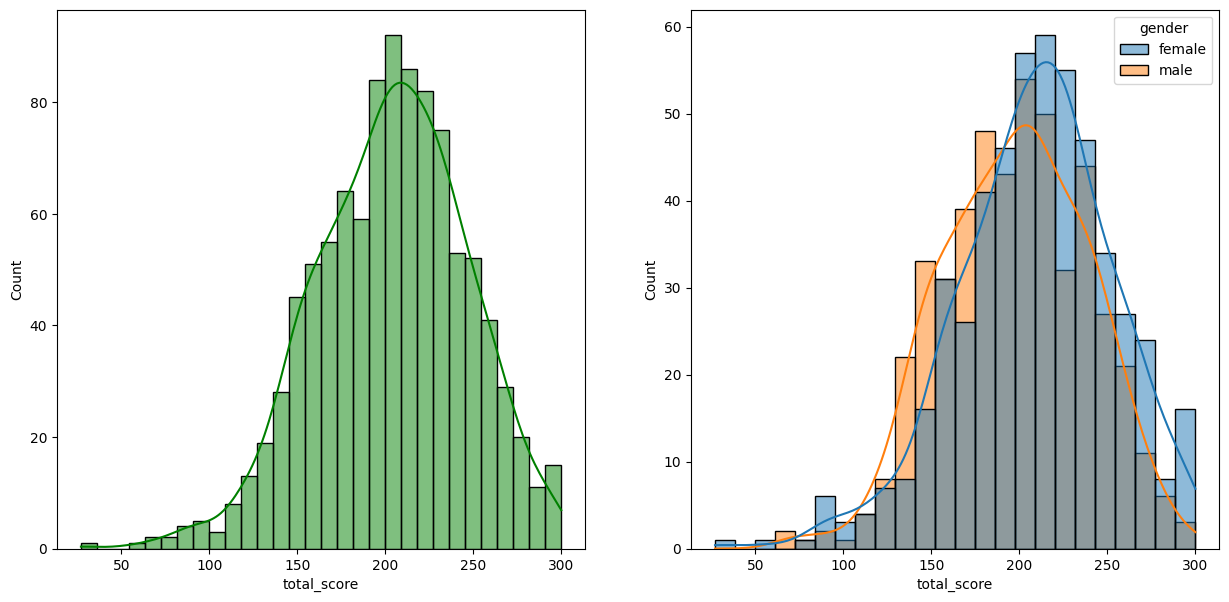

In [34]:
fig, axs = plt.subplots(1,2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score' , kde=True, hue='gender')
plt.show()

<h1> Insights </h1>

- Female students tend to perform well then male student

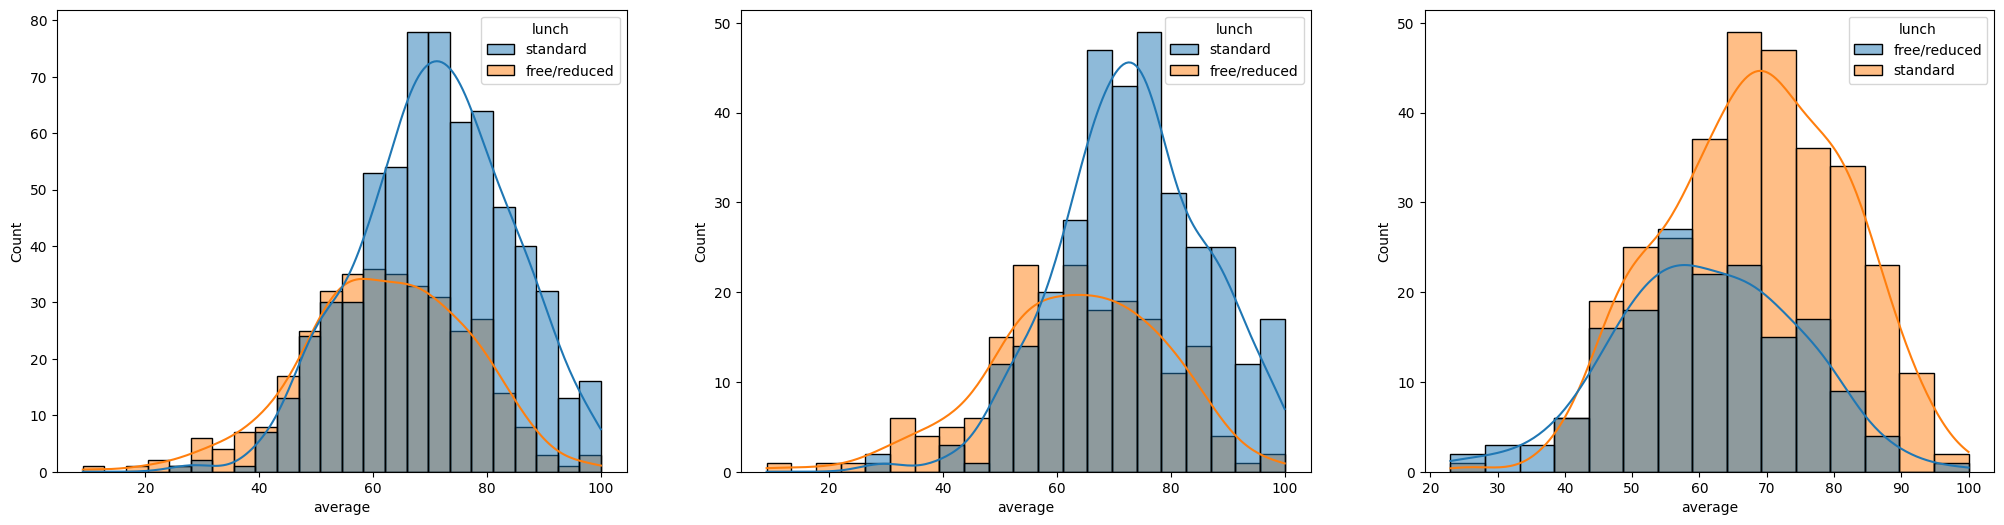

In [ ]:

plt.figure(figsize=(25,6))  # Corrected figsize placement

# First subplot
plt.subplot(1, 3, 1)  # Corrected subplot indices
sns.histplot(data=df, x='average', kde=True, hue='lunch')

# Second subplot
plt.subplot(1, 3, 2)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')

# Third subplot
plt.subplot(1, 3, 3)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch')

plt.show()

<h1>Insights</h1>

- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or female.


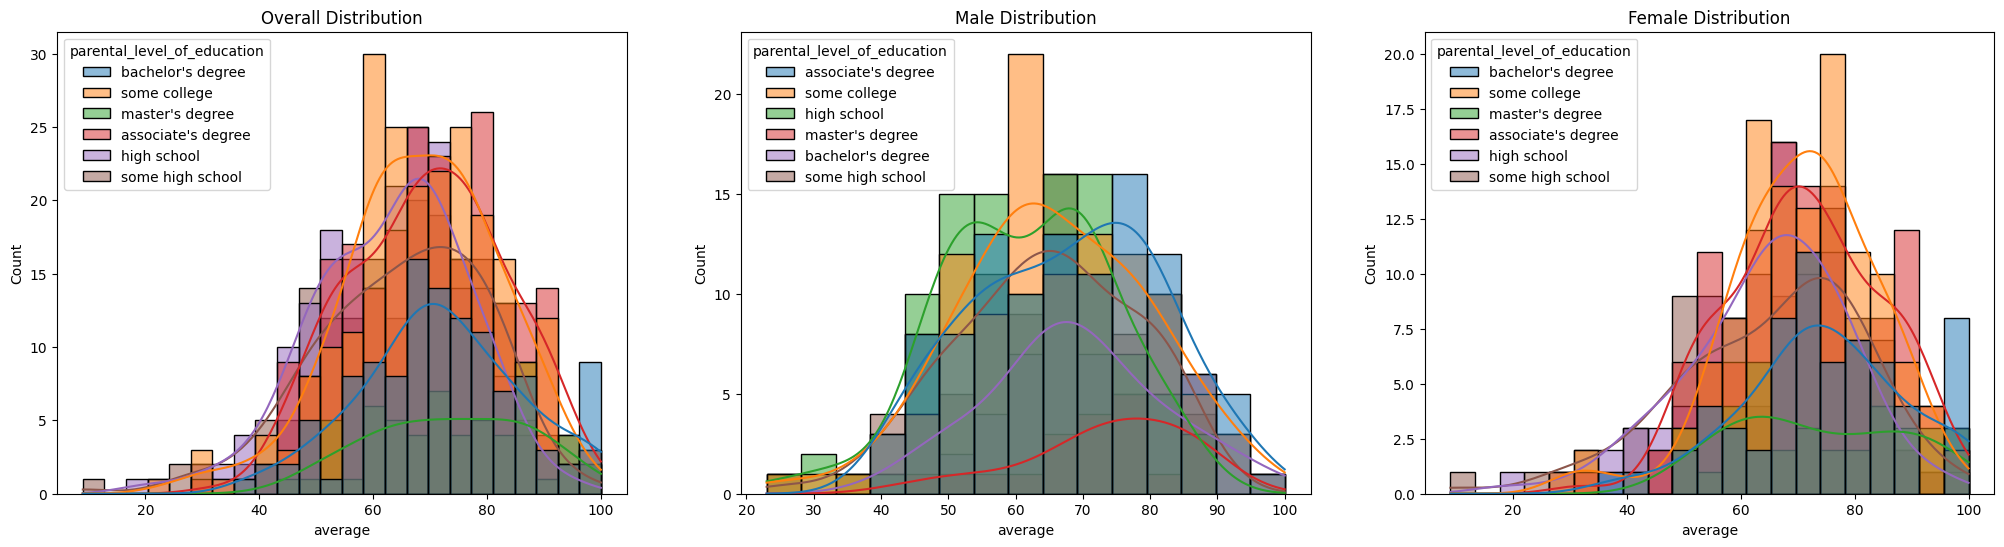

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))  # 1 row, 3 columns

sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education', ax=axes[0])
axes[0].set_title("Overall Distribution")

sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental_level_of_education', ax=axes[1])
axes[1].set_title("Male Distribution")

sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental_level_of_education', ax=axes[2])
axes[2].set_title("Female Distribution")

plt.show()


<h1>Insights</h1>

- In general parent's education dont help student perform well in exam 
- 2nd plot shows tha parents whoes education is of associate's degree or master's degree their male child tend to perform well in exam 
- 3rd plot we can see there is no effect of parent's education on female student 

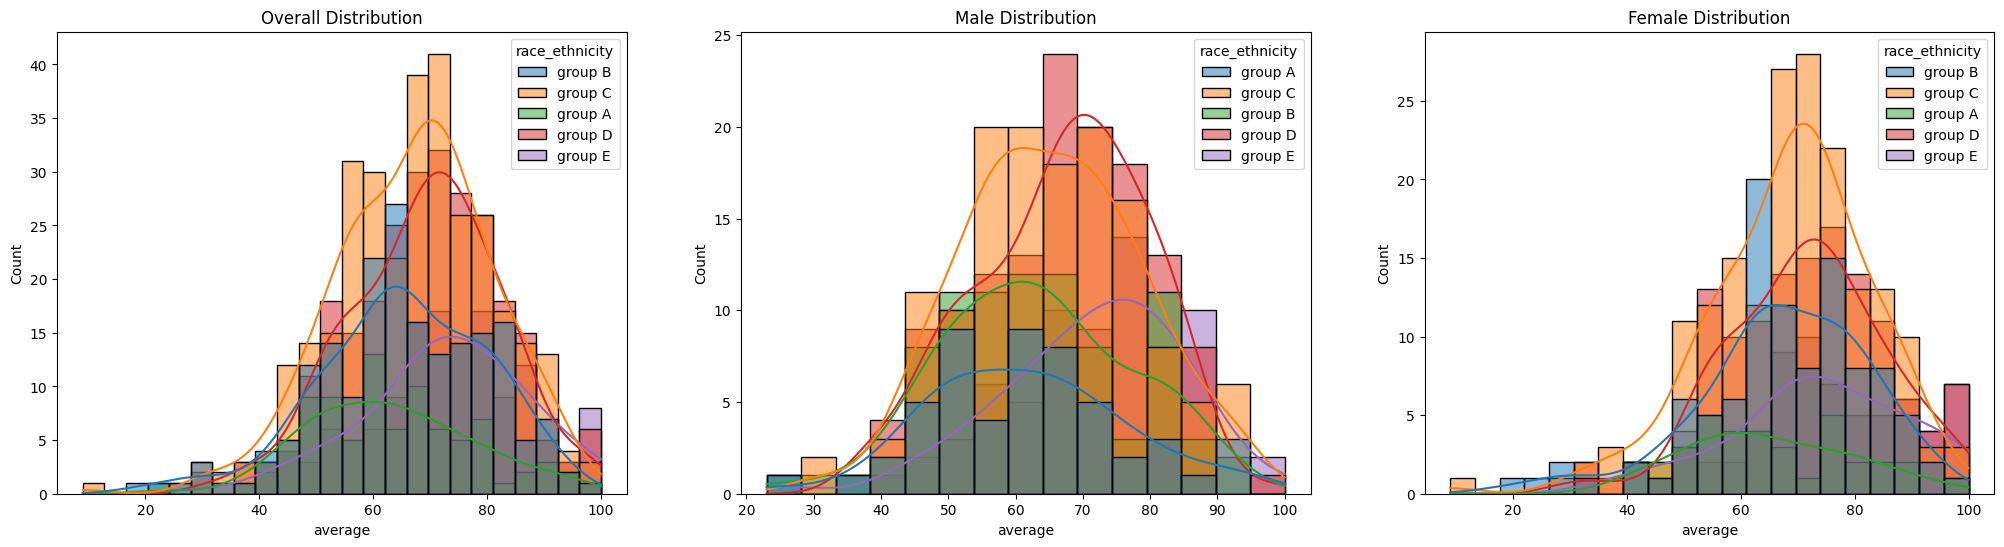

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6)) 

sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity', ax=axes[0])
axes[0].set_title("Overall Distribution")

sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='race_ethnicity', ax=axes[1])
axes[1].set_title("Male Distribution")

sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='race_ethnicity', ax=axes[2])
axes[2].set_title("Female Distribution")

plt.show()

<h1>Insights</h1>

- Students of group A and group B tends to perform poorly in exam 
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female 


<h1>4.2 Maximum score of students in all three subjects</h1>

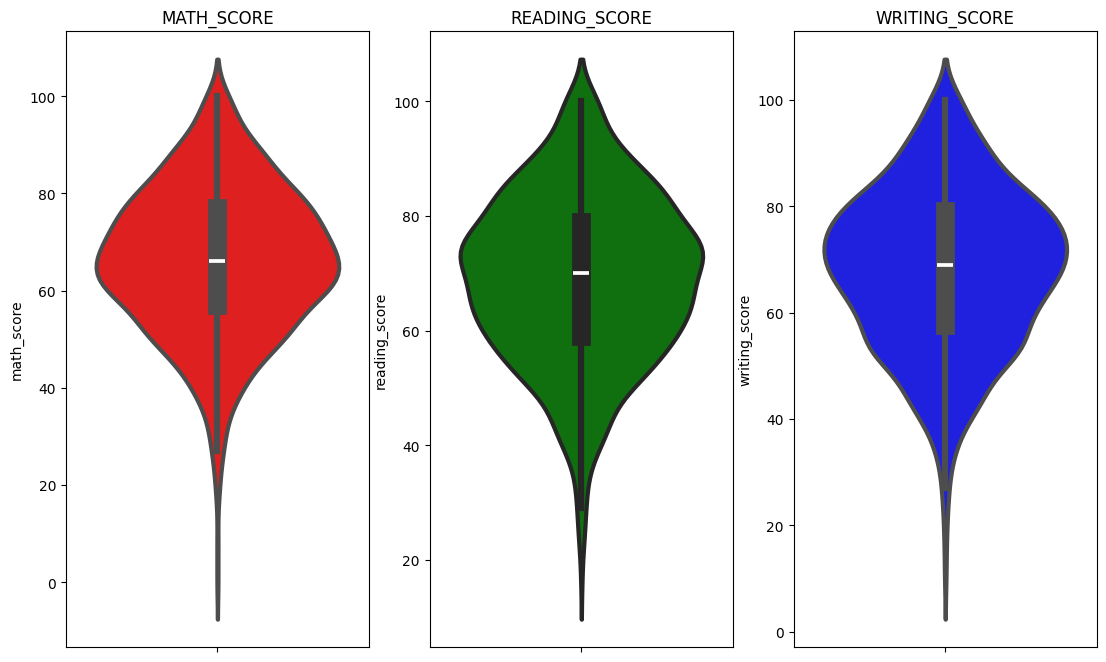

In [21]:
plt.figure(figsize=(18,8))

plt.subplot(1,4,1)
plt.title('MATH_SCORE')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)


plt.subplot(1,4,2)
plt.title('READING_SCORE')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)


plt.subplot(1,4,3)
plt.title('WRITING_SCORE')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)
plt.show()

<h1>Insights</h1>

- From above three plots its clearly visible that most of the students score 60-80 in Maths whereas in Reading and Writing the most of them score from 50-80 